## Observations and Insights 

In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Checking the number of mice

total_mice = mouse_metadata_df["Mouse ID"].count()
total_mice

249

In [4]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_data_complete_df = pd.merge(mouse_metadata_df,study_results_df , how="outer", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
clean_mouse_data_complete_df = mouse_data_complete_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
clean_mouse_data_complete_df.shape

(1888, 8)

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data_complete_df["Mouse ID"].count()

1888

In [10]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



# tumor volume and regimen

In [12]:
drug_regimen_df =clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)","Timepoint"]] 
drug_regimen_df.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Ramicane,k403,45.000000,0
1,Ramicane,k403,38.825898,5
2,Ramicane,k403,35.014271,10
3,Ramicane,k403,34.223992,15
4,Ramicane,k403,32.997729,20


In [13]:
drug_regimen_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [14]:
df = drug_regimen_df.set_index("Drug Regimen")
df.head()

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,45.000000,0
Ramicane,k403,38.825898,5
Ramicane,k403,35.014271,10
Ramicane,k403,34.223992,15
Ramicane,k403,32.997729,20


In [15]:
tumor_regimen_ramicane_df = df.loc["Ramicane"]
average = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].mean()
average

Tumor Volume (mm3)    40.216745
dtype: float64

In [16]:
median = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].median()
median

Tumor Volume (mm3)    40.673236
dtype: float64

In [17]:
variance = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].var()
variance

Tumor Volume (mm3)    23.486704
dtype: float64

In [18]:
standard_deviation = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].std()
standard_deviation

Tumor Volume (mm3)    4.846308
dtype: float64

In [19]:
sem = tumor_regimen_ramicane_df[["Tumor Volume (mm3)"]].sem()
sem

Tumor Volume (mm3)    0.320955
dtype: float64

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [21]:
summary_statistics_df = pd.DataFrame({"Drug Regimen": ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
                                     "Mean": [40.216745,40.675741, 52.884795, 54.033581,52.591172, 54.233149,  53.236507,  55.235638, 52.393463, 54.331565],
                                     "Median": [40.673236, 40.675741, 51.820584, 52.288934,51.776157,  52.431737,  51.818479,  53.698743, 50.909965, 52.509285],
                                     "Variance": [23.486704, 24.947764, 43.128684,61.168083,39.290177, 59.450562, 48.533355, 68.553577,  43.138803, 66.173479],
                                     "Standard Deviation": [4.846308, 4.994774,6.567243, 7.821003, 6.268188, 7.710419,  6.966589,  8.279709, 6.568014, 8.134708],
                                     "SEM": [0.320955, 0.329346, 0.492236,0.581331,0.469821, 0.573111,  0.516398, 0.60386, 0.525862,  0.596466]
})
summary_statistics_df.head(10)

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
4,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
5,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
8,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
9,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [22]:
making_plots_df = clean_mouse_data_complete_df[["Drug Regimen", "Mouse ID","Timepoint"]]
making_plots_df

,Drug Regimen,Mouse ID,Timepoint
0,Ramicane,k403,0
1,Ramicane,k403,5
2,Ramicane,k403,10
3,Ramicane,k403,15
4,Ramicane,k403,20
...,...,...,...
1888,Naftisol,z969,25
1889,Naftisol,z969,30
1890,Naftisol,z969,35
1891,Naftisol,z969,40


In [23]:
Set_df = making_plots_df.set_index("Drug Regimen")
Set_df.head()

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20


In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ramicane_df = Set_df.loc["Ramicane"]
ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


In [25]:
len(ramicane_df)

228

In [26]:
bar_ramicane_df = ramicane_df[["Mouse ID", "Timepoint"]]
bar_ramicane_df

,Mouse ID,Timepoint
Drug Regimen,,
Ramicane,k403,0
Ramicane,k403,5
Ramicane,k403,10
Ramicane,k403,15
Ramicane,k403,20
...,...,...
Ramicane,w678,5
Ramicane,y449,0
Ramicane,y449,5


<IPython.core.display.Javascript object>


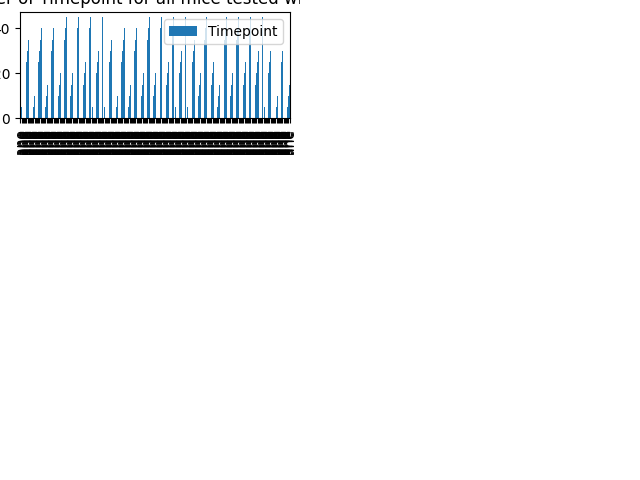

In [27]:
bar_ramicane_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ramicane")
plt.tight_layout()

In [28]:
Capomulin_df = Set_df.loc["Capomulin"]
Capomulin_df

,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,s185,0
Capomulin,s185,5
Capomulin,s185,10
Capomulin,s185,15
Capomulin,s185,20
...,...,...
Capomulin,i557,45
Capomulin,r157,0
Capomulin,r157,5


<IPython.core.display.Javascript object>


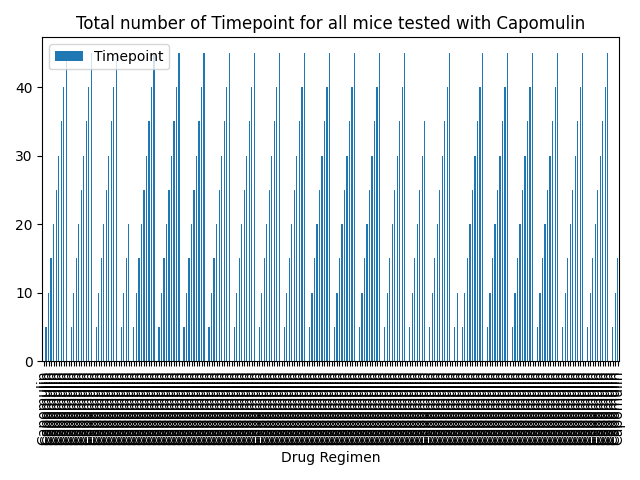

In [29]:
Capomulin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Capomulin")
plt.tight_layout()

In [30]:
Infubinol_df = Set_df.loc["Infubinol"]
Infubinol_df

,Mouse ID,Timepoint
Drug Regimen,,
Infubinol,a203,0
Infubinol,a203,5
Infubinol,a203,10
Infubinol,a203,15
Infubinol,a203,20
...,...,...
Infubinol,z581,25
Infubinol,z581,30
Infubinol,z581,35


<IPython.core.display.Javascript object>


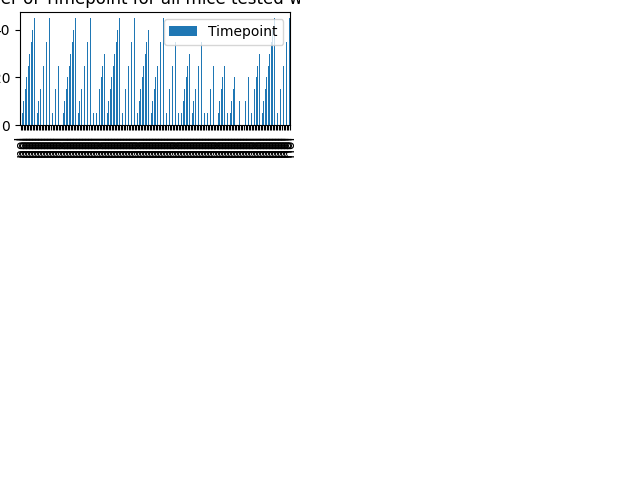

In [31]:
Infubinol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Infubinol")
plt.tight_layout()

In [32]:
Placebo_df = Set_df.loc["Placebo"]
Placebo_df

,Mouse ID,Timepoint
Drug Regimen,,
Placebo,a262,0
Placebo,a262,5
Placebo,a262,10
Placebo,a262,15
Placebo,a262,20
...,...,...
Placebo,y478,25
Placebo,y478,30
Placebo,y478,35


In [33]:
Placebo_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Placebo")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [34]:
Ceftamin_df = Set_df.loc["Ceftamin"]
Ceftamin_df

,Mouse ID,Timepoint
Drug Regimen,,
Ceftamin,a275,0
Ceftamin,a275,5
Ceftamin,a275,10
Ceftamin,a275,15
Ceftamin,a275,20
...,...,...
Ceftamin,y865,25
Ceftamin,y865,30
Ceftamin,y865,35


In [35]:
Ceftamin_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ceftamin")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [36]:
Stelasyn_df = Set_df.loc["Stelasyn"]
Stelasyn_df

,Mouse ID,Timepoint
Drug Regimen,,
Stelasyn,a366,0
Stelasyn,a366,5
Stelasyn,a366,10
Stelasyn,a366,15
Stelasyn,a366,20
...,...,...
Stelasyn,x402,35
Stelasyn,x402,40
Stelasyn,x402,45


In [37]:
Stelasyn_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Stelasyn")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [38]:
Zoniferol_df = Set_df.loc["Zoniferol"]
Zoniferol_df

,Mouse ID,Timepoint
Drug Regimen,,
Zoniferol,a401,0
Zoniferol,a401,5
Zoniferol,a401,10
Zoniferol,a401,15
Zoniferol,a401,20
...,...,...
Zoniferol,w575,45
Zoniferol,x613,0
Zoniferol,x613,5


In [39]:
Zoniferol_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Zoniferol")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [40]:
Ketapril_df = Set_df.loc["Ketapril"]
Ketapril_df

,Mouse ID,Timepoint
Drug Regimen,,
Ketapril,a457,0
Ketapril,a457,5
Ketapril,a457,10
Ketapril,c580,0
Ketapril,c580,5
...,...,...
Ketapril,y260,25
Ketapril,y260,30
Ketapril,y260,35


In [41]:
Ketapril_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Ketapril")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [42]:
Propriva_df = Set_df.loc["Propriva"]
Propriva_df

,Mouse ID,Timepoint
Drug Regimen,,
Propriva,a699,0
Propriva,a699,5
Propriva,a699,10
Propriva,a699,15
Propriva,a699,20
...,...,...
Propriva,x209,5
Propriva,x209,10
Propriva,z435,0


In [43]:
Propriva_df.plot.bar()
plt.title("Total number of Timepoint for all mice tested with Propriva")
plt.tight_layout()

<IPython.core.display.Javascript object>

In [44]:
Naftisol_df = Set_df.loc["Naftisol"]
Naftisol_df

,Mouse ID,Timepoint
Drug Regimen,,
Naftisol,a818,0
Naftisol,a818,5
Naftisol,a818,10
Naftisol,a818,15
Naftisol,a818,20
...,...,...
Naftisol,z969,25
Naftisol,z969,30
Naftisol,z969,35


In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# plot = df.plot.pie(y='mass', figsize=(5, 5)



In [47]:
df

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Ramicane,k403,45.000000,0
Ramicane,k403,38.825898,5
Ramicane,k403,35.014271,10
Ramicane,k403,34.223992,15
Ramicane,k403,32.997729,20
...,...,...,...
Naftisol,z969,63.145652,25
Naftisol,z969,65.841013,30
Naftisol,z969,69.176246,35


In [48]:
data = df.Sex.value_counts()
data

AttributeError: 'DataFrame' object has no attribute 'Sex'

In [ ]:
data = {"Sex" : [958, 930]}
distribution_female_male_df = pd.DataFrame(data, columns = ["Sex"], index = ["Male", "Female"])
distribution_female_male_df.plot.pie(y="Sex",autopct="%1.1f%%", startangle=90)
plt.show()

In [ ]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

In [ ]:
df.head()

In [ ]:
ramicane_p_df = df.loc["Ramicane"]
ramicane_p_df

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
df = clean_mouse_data_complete_df.set_index("Drug Regimen")
df.head()

In [ ]:
ramicane_volume_df = df.loc["Ramicane"]
ramicane_volume_df

In [ ]:
Tumorvolume_ramicane = ramicane_volume_df["Tumor Volume (mm3)"]
Tumorvolume_ramicane

In [ ]:
plt.figure(figsize=(3,4))
plt.boxplot(Tumorvolume_ramicane)
plt.title("Final Tumor Volume of Ramicane")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

computing quartiles

In [ ]:
quartiles = Tumorvolume_ramicane.quantile([.25,.5,.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq
print(f"{lowerq}")
print(f"{upperq}")
print(f"{quartiles[0.5]}")

Identifying Outliers

In [ ]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below {lower_bound} could be outliers. ")
print(f"values below {upper_bound} could be outliers. ")

In [ ]:
Capomulin_volume_df = df.loc["Capomulin"]
Capomulin_volume_df

In [ ]:
Tumorvolume_capomulin = Capomulin_volume_df["Tumor Volume (mm3)"]
Tumorvolume_capomulin

In [ ]:
plt.figure(figsize=(3,4))
plt.boxplot(Tumorvolume_capomulin)
plt.title("Final Tumor Volume of Capomuln")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

In [ ]:
quartiles = Tumorvolume_capomulin.quantile([.25,.5,.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq
print(f"{lowerq}")
print(f"{upperq}")
print(f"{quartiles[0.5]}")

In [ ]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below {lower_bound} could be outliers. ")
print(f"values below {upper_bound} could be outliers. ")

In [ ]:
Infubinol_volume_df = df.loc["Infubinol"]
Infubinol_volume_df

In [ ]:
Tumorvolume_infubinol = Infubinol_volume_df["Tumor Volume (mm3)"]
Tumorvolume_infubinol

In [ ]:
plt.figure(figsize=(3,4))
plt.boxplot(Tumorvolume_infubinol)
plt.title("Final Tumor Volume of Infubinol")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

In [ ]:
quartiles = Tumorvolume_infubinol.quantile([.25,.5,.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq
print(f"{lowerq}")
print(f"{upperq}")
print(f"{quartiles[0.5]}")

In [ ]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below {lower_bound} could be outliers. ")
print(f"values below {upper_bound} could be outliers. ")

In [ ]:
Ceftamin_volume_df = df.loc["Ceftamin"]
Ceftamin_volume_df

In [ ]:
Tumorvolume_ceftamin = Ceftamin_volume_df["Tumor Volume (mm3)"]
Tumorvolume_ceftamin

In [ ]:
plt.figure(figsize=(3,4))
plt.boxplot(Tumorvolume_ceftamin)
plt.title("Final Tumor Volume of Ceftamin")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

In [ ]:
quartiles = Tumorvolume_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles [0.25]
upperq = quartiles [0.75]
iqr = upperq-lowerq
print(f"{lowerq}")
print(f"{upperq}")
print(f"{quartiles[0.5]}")

In [ ]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"values below {lower_bound} could be outliers. ")
print(f"values below {upper_bound} could be outliers. ")

In [ ]:
total_volume_df = Capomulin_volume_df.loc["Capomulin"]
total_capomulin = total_volume_df[["Tumor Volume (mm3)"]].max()
total_capomulin

In [ ]:
Infubinol_volume_df = df.loc["Infubinol"]
Infubinol_volume_df

In [ ]:
total_volume_df = Infubinol_volume_df.loc["Infubinol"]
total_Infubinol = total_volume_df[["Tumor Volume (mm3)"]].max()
total_Infubinol

In [ ]:
Ceftamin_volume_df = df.loc["Ceftamin"]
Ceftamin_volume_df

In [ ]:
total_volume_df = Ceftamin_volume_df.loc["Ceftamin"]
total_ceftamin = total_volume_df[["Tumor Volume (mm3)"]].max()
total_ceftamin

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
Capomulin_volume_df = df.loc["Capomulin"]
Capomulin_volume_df

In [ ]:
c_df = Capomulin_volume_df.set_index("Mouse ID")
c_df.head()

In [ ]:
capomulin_s185_df = c_df.loc["s185"]
capomulin_s185_df

In [ ]:
capomulin_s185_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Tumor volume Vs. Timepoint")



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [ ]:
tumor_volume_weight_df = pd.DataFrame(capomulin_s185_df,columns = ["Weight (g)", "Tumor Volume (mm3)"])
tumor_volume_weight_df.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
r = tumor_volume_weight_df.corr()["Weight (g)"]["Tumor Volume (mm3)"]
print("correlation between tumor volume and weight is {:.2f}".format(r))

The correlation coefficent,r, shows that there is no correlation between two variables (tumor volume, weight of mice). This means that the variables do not appear to be statistically related, that the value of one variable doesn’t increase or decrease in association with the increase or decrease of the other variable.